In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Seperate features and targets
X = data.drop(columns=['Species'])

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [18]:
data['cluster'] = kmeans.fit_predict(X)

In [19]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2


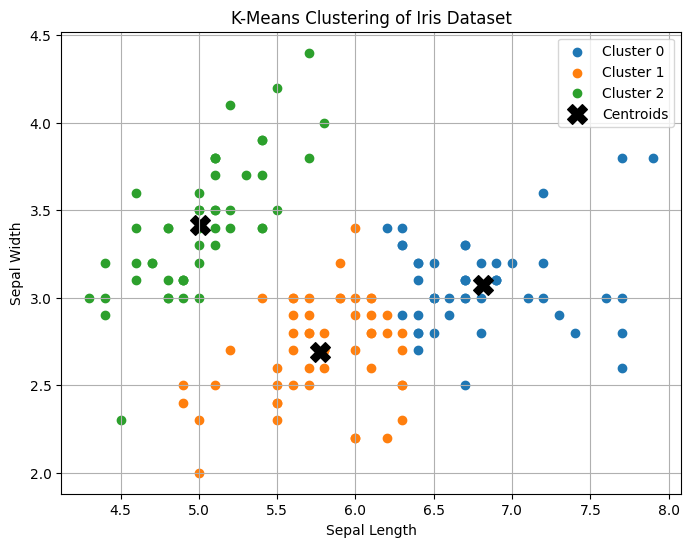

In [25]:
# Select features for clustering
X = data[["SepalLengthCm", "SepalWidthCm"]]

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data["cluster"] = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):
    clustered_data = data[data["cluster"] == cluster]
    plt.scatter(clustered_data["SepalLengthCm"], clustered_data["SepalWidthCm"], label=f"Cluster {cluster}")

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-Means Clustering of Iris Dataset")
plt.legend()
plt.grid(True)
plt.show()